Домашняя работа к 18.10.2025. Жесткова Анастасия. Группа 3822Б1ПМоп1

**0. Описание задачи**

Страховая компания хочет разработать конкурентоспособную систему расчета тарифов автострахования. Для этого необходимо построить модель, прогнозирующую вероятность подачи страхового требования клиентом в следующем году.

Основные задачи:
1. Создать прототип модели для предсказания страховых случаев на основе данных о клиентах
2. Провести необходимую обработку и подготовку данных
3. Обеспечить интерпретируемость модели - определить наиболее значимые факторы, влияющие на риск страхового случая

Датасет содержит информацию о клиентах с указанием, подавали ли они страховое требование в предыдущем году.

In [103]:
import numpy as np              
import pandas as pd            
import matplotlib.pyplot as plt 
import seaborn as sns           
import sklearn

**1. Чтение данных**

In [104]:
dataset = pd.read_csv("C:/Users/nasty/OneDrive/Рабочий стол/ML/customer-data.csv")
dataset

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True



Пояснения к данным:

1. **id** — уникальный номер
2. **age** — возраст клиента
3. **gender** — пол клиента
4. **race** — принадлежность к группе
5. **driving_experience** — водительский стаж
6. **education** — образование
7. **income** — уровень дохода
8. **credit_score** — оценка платежеспособности/рейтинг доверия клиенту
9. **vehicle_ownership** — владение транспортным средством
10. **vehicle_year** — год выпуска автомобиля
11. **married** — семейный статус
12. **children** — наличие детей
13. **postal_code** — почтовый индекс
14. **annual_mileage** — годовой пробег авто
15. **vehicle_type** — тип автомобиля
16. **speeding_violations** — число нарушений правил превышения скорости
17. **DUIs** — число штрафов за вождение в нетрезвом состоянии
18. **past_accidents** — количество инцидентов в прошлом
19. **outcome** — обратился ли клиент за страховыми выплатами

In [105]:
dataset.dtypes

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership         bool
vehicle_year            object
married                   bool
children                  bool
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                   bool
dtype: object

In [106]:
# заменим тип bool на 0 и 1
for i in dataset:
    if dataset[i].dtype == 'bool':
        dataset[i] = dataset[i].map({True : 1, False : 0})

dataset.dtypes    

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership        int64
vehicle_year            object
married                  int64
children                 int64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                  int64
dtype: object

Заменим тип "object" на специальный (для хранения категориальных значений):

In [107]:
dataset["age"] = dataset["age"].astype('category')
dataset["gender"] = dataset["gender"].astype('category')
dataset["race"] = dataset["race"].astype('category')
dataset["driving_experience"] = dataset["driving_experience"].astype('category')
dataset["education"] = dataset["education"].astype('category')
dataset["income"] = dataset["income"].astype('category')
dataset["vehicle_year"] = dataset["vehicle_year"].astype('category')
dataset["vehicle_type"] = dataset["vehicle_type"].astype('category')

In [108]:
dataset["age"].dtype, dataset["gender"].dtype, dataset["race"].dtype, dataset["driving_experience"].dtype, dataset["education"].dtype, dataset["income"].dtype, dataset["vehicle_year"].dtype, dataset["vehicle_type"].dtype 

(CategoricalDtype(categories=['16-25', '26-39', '40-64', '65+'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['majority', 'minority'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['0-9y', '10-19y', '20-29y', '30y+'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['high school', 'none', 'university'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['middle class', 'poverty', 'upper class', 'working class'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['after 2015', 'before 2015'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['sedan', 'sports car'], ordered=False, categories_dtype=object))

**2. Разбитие данных на обучающую и тестовую выборки**

In [132]:
y = dataset['outcome']
x = dataset.drop(['outcome'], axis = 1)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.3, random_state = 42)

**3. Визуализация данных и вычисление основных характеристик**

Вычислим основные характеристики: средние значения, стандартное отклонение, минимальное и максимальное значения и медиану:

In [110]:
selected_stats = dataset.describe().loc[['mean', 'std', 'min', 'max', '50%']]
selected_stats

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000


In [111]:
describe_two = dataset.describe(include = ['category'])
describe_two

,age,gender,race,driving_experience,education,income,vehicle_year,vehicle_type
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Построим корреляционную матрицу:

In [112]:
dataset_corr = dataset.drop('id', axis=1).corr(numeric_only=True)
dataset_corr

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
credit_score,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
vehicle_ownership,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
married,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
children,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
postal_code,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
annual_mileage,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
speeding_violations,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIs,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495
outcome,-0.325286,-0.378921,-0.262104,-0.232835,0.095889,0.187154,-0.291862,-0.189352,-0.311495,1.000000


Мы не смотрим **id**, так как это лишь индивидуальный номер клиента.

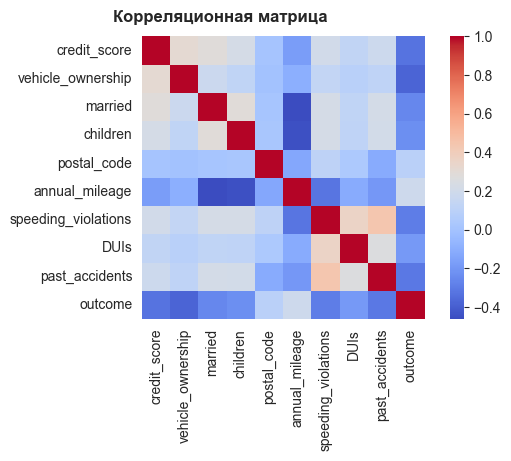

In [113]:
sns.heatmap(dataset_corr, square = True, cmap = 'coolwarm')
plt.suptitle("Корреляционная матрица", fontsize=12, fontweight='bold', y = 0.95)
plt.tight_layout()
plt.show()

Средняя корреляция наблюдается у признаков **speeding_violations** (нарушения за скорость) и **past_accidents** (инциденты). Это указывает на следующую динамику: часто какие - либо инциденты происходят из - за превышения скоростного режима на дорогах. Также можно заметить среднюю корреляцию у признаков **speeding_violations** (нарушения за скорость) и **DUIs** (вождение в нетрезвом виде) - значит вождение в нетрезвом состоянии также является частой причиной аварий на дорогах, но реже, чем превышение скорости.

Отрицательная корреляция признаков **credit_score** (рейтинг доверия) и **outcome** (обращение за страховыми выплатами) означает обратную динамику: чем чаще клиент обращается за страховкой, тем ниже его рейтинг доверия.

Далее построим гистограммы:

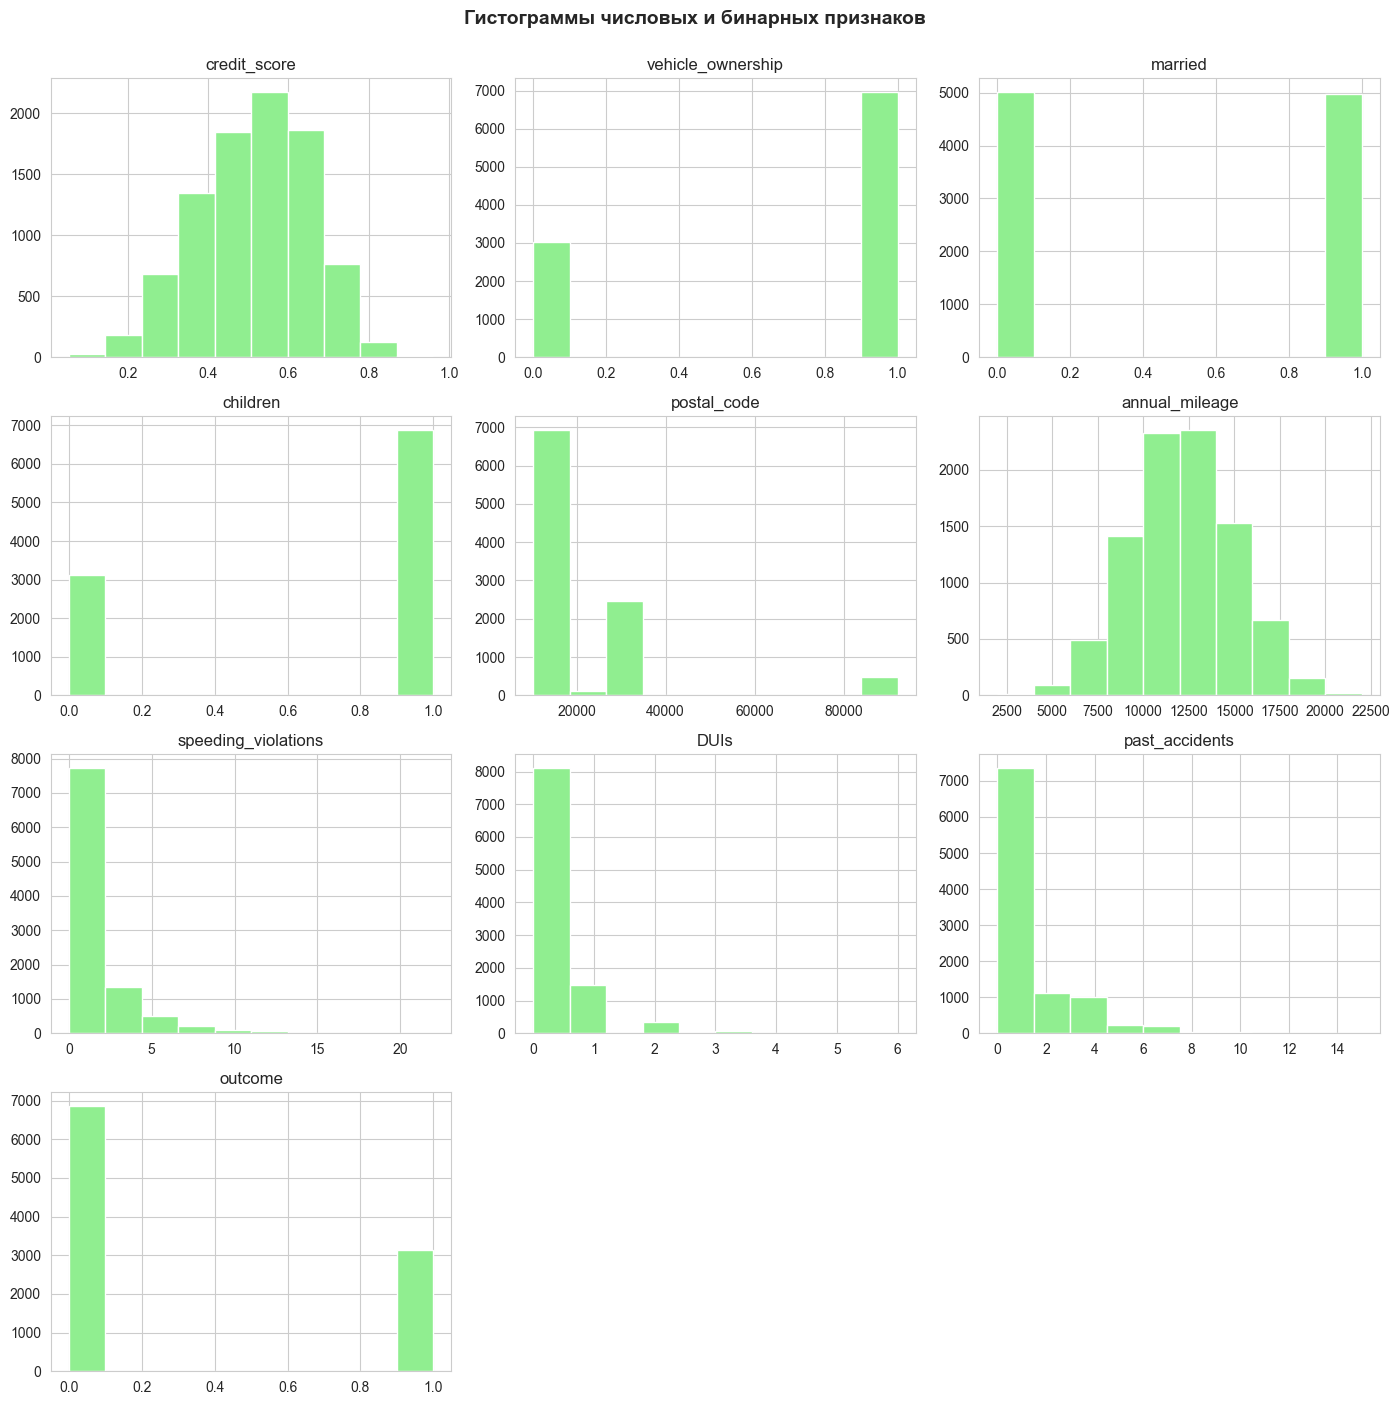

In [114]:
sns.set_style('whitegrid')
numbers = pd.Series([col for col in dataset.columns if col != 'id'])
dataset[numbers].hist(figsize=(14, 14), color='lightgreen')
plt.suptitle("Гистограммы числовых и бинарных признаков", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

Рассмотрим взаимосвязь между признаками и переменной **outcome**. (**count** - количество обращений в страховую компанию)

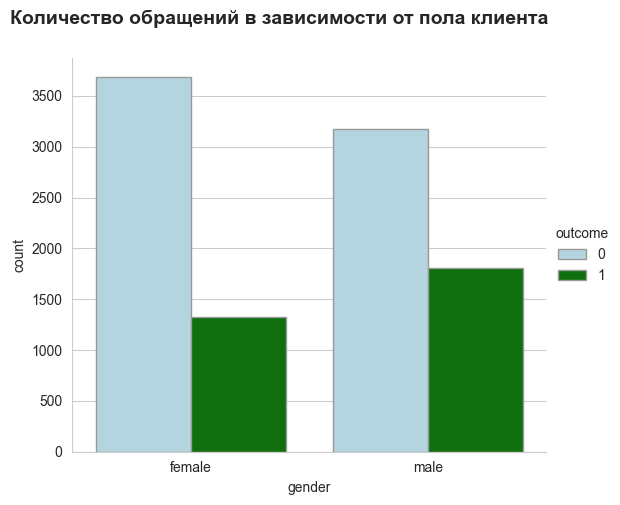

In [115]:
g = sns.catplot(x="gender", hue="outcome", kind="count", palette=['lightblue', 'green'], edgecolor=".6", data=dataset)
g._legend.set_bbox_to_anchor((1.1, 0.5))
plt.suptitle("Количество обращений в зависимости от пола клиента", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

По диаграмме видно, что мужчины чаще обращаются в страховую компанию, чем женщины.


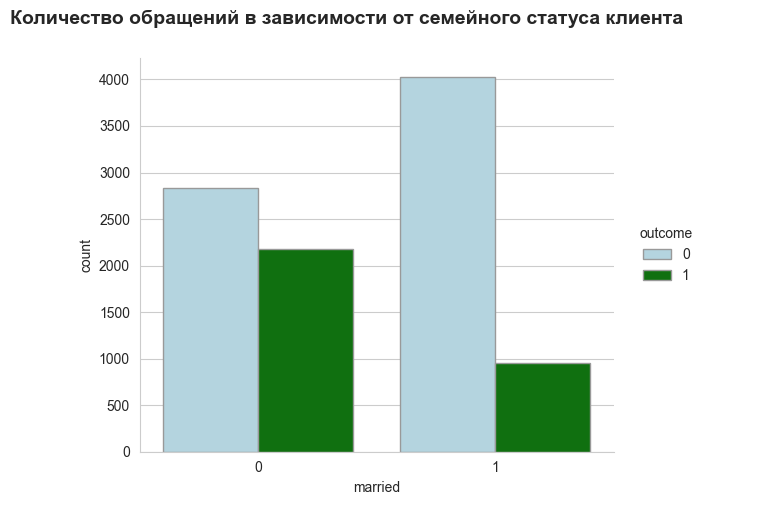

In [116]:
g = sns.catplot(x = "married", hue = "outcome", kind = "count", palette = ['lightblue', 'green'], edgecolor = ".6", data = dataset)
g._legend.set_bbox_to_anchor((1.25, 0.5))
plt.suptitle("Количество обращений в зависимости от семейного статуса клиента", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

Люди в браке реже обращаются в страховую компанию, чем неженатые/незамужние.

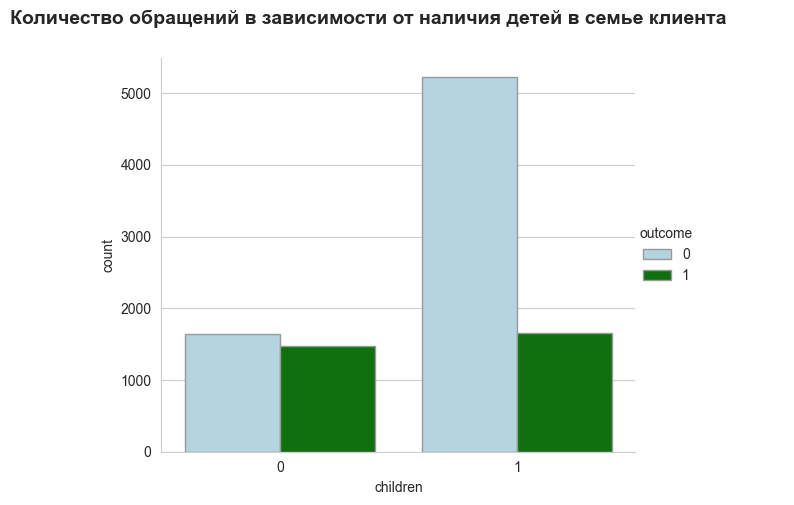

In [117]:
g = sns.catplot(x = "children", hue = "outcome", kind = "count", palette = ['lightblue', 'green'], edgecolor = ".6", data = dataset)
g._legend.set_bbox_to_anchor((1.25, 0.5))
plt.suptitle("Количество обращений в зависимости от наличия детей в семье клиента", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

Клиенты, у которых есть дети, реже обращаются в страховую компанию.

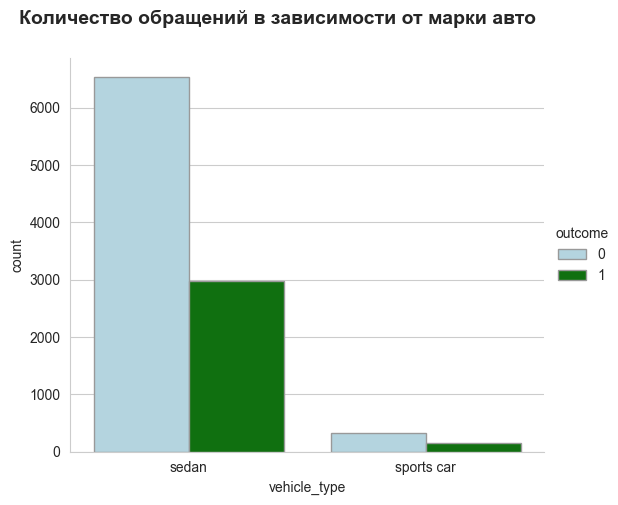

In [118]:
g = sns.catplot(x = "vehicle_type", hue = "outcome", kind = "count", palette = ['lightblue', 'green'], edgecolor = ".6", data = dataset)
g._legend.set_bbox_to_anchor((1.1, 0.5))
plt.suptitle("Количество обращений в зависимости от марки авто", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

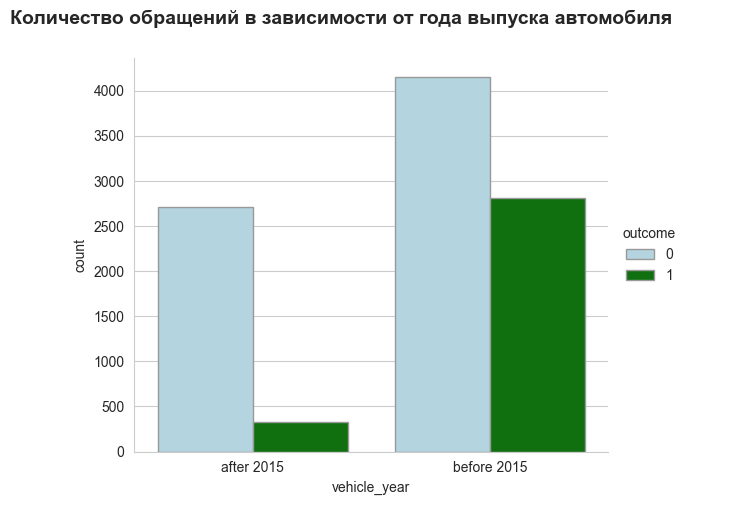

In [119]:
g = sns.catplot(x = "vehicle_year", hue = "outcome", kind = "count", palette = ['lightblue', 'green'], edgecolor = ".6", data = dataset)
g._legend.set_bbox_to_anchor((1.22, 0.5))
plt.suptitle("Количество обращений в зависимости от года выпуска автомобиля", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

Машины, выпущенные после 2015 года, реже попадают в аварии.

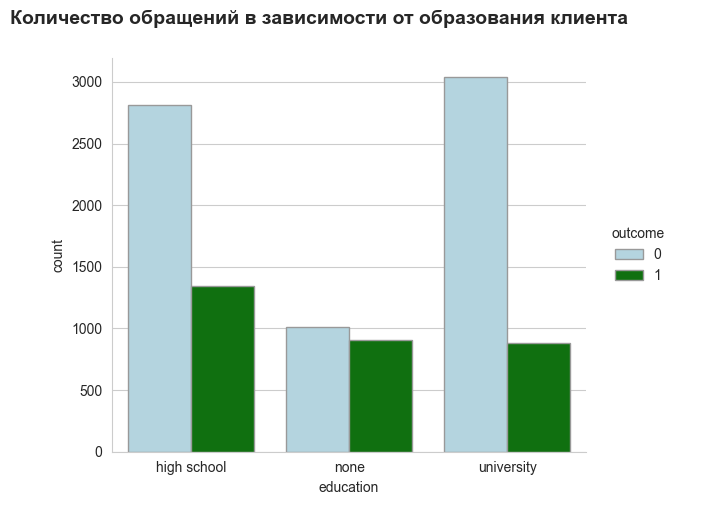

In [120]:
g = sns.catplot(x = "education", hue = "outcome", kind = "count", palette = ['lightblue', 'green'], edgecolor = ".6", data = dataset)
g._legend.set_bbox_to_anchor((1.2, 0.5))
plt.suptitle("Количество обращений в зависимости от образования клиента", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

Реже всего в страховую компанию обращаются люди, имеющие высшее образование.

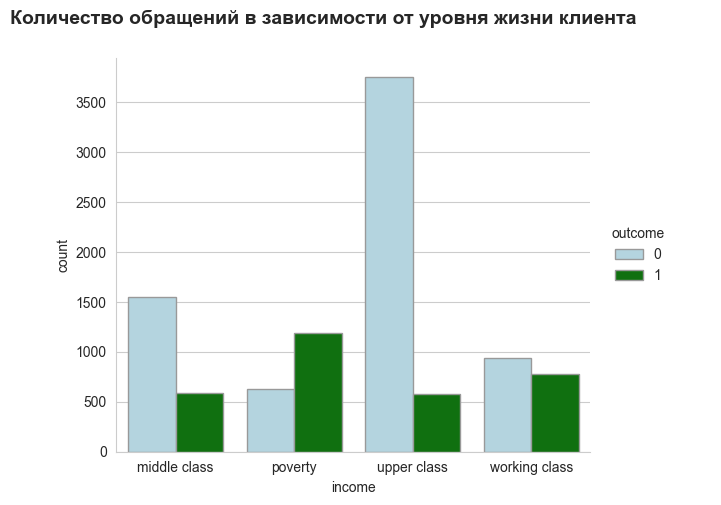

In [121]:
g = sns.catplot(x = "income", hue = "outcome", kind = "count", palette = ['lightblue', 'green'], edgecolor = ".6", data = dataset)
g._legend.set_bbox_to_anchor((1.2, 0.5))
plt.suptitle("Количество обращений в зависимости от уровня жизни клиента", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

Повышение уровня жизни увеличивают вероятность того, что клиент не будет обращаться в страховую компанию.

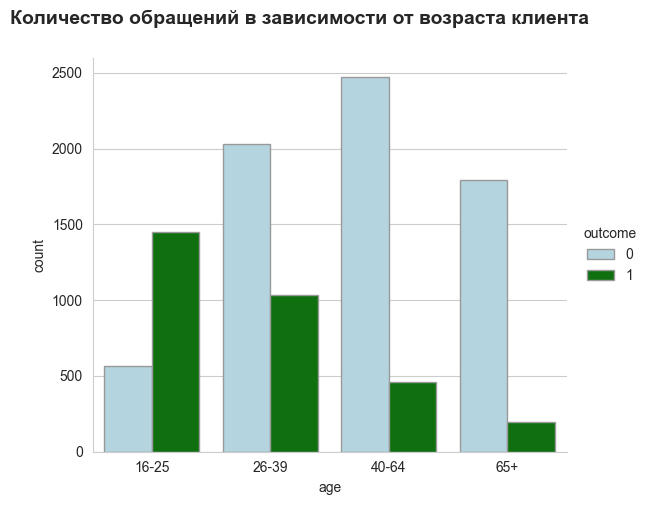

In [122]:
g = sns.catplot(x = "age", hue = "outcome", kind = "count", palette = ['lightblue', 'green'], edgecolor = ".6", data = dataset)
g._legend.set_bbox_to_anchor((1.15, 0.5))
plt.suptitle("Количество обращений в зависимости от возраста клиента", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

Молодёжь намного чаще обращается в стразовую компанию, чем старшее поколение.

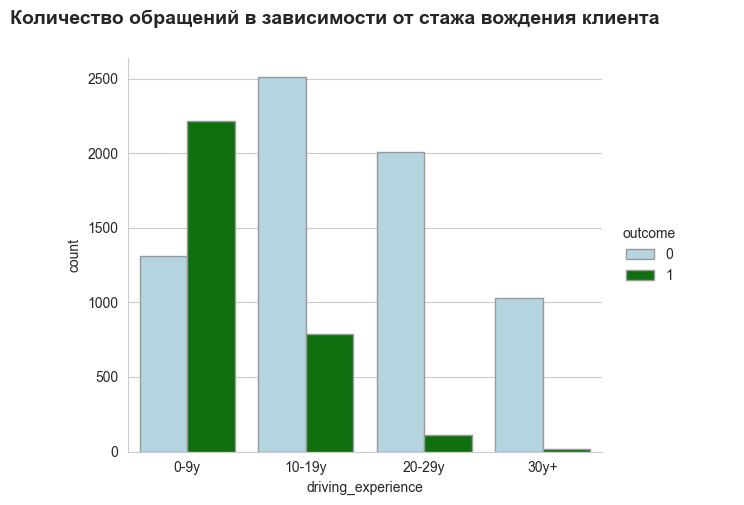

In [123]:
g = sns.catplot(x = "driving_experience", hue = "outcome", kind = "count", palette = ['lightblue', 'green'], edgecolor = ".6", data = dataset)
g._legend.set_bbox_to_anchor((1.22, 0.5))
plt.suptitle("Количество обращений в зависимости от стажа вождения клиента", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

Неопытные водители чаще обращаются в страховую компанию.

Можно удалить столбцы **id**, **postal_code** и **race**, поскольку они влияют только на уникальность каждого клиента. Затем удалим получившиеся дубликаты.

In [124]:
dataset = dataset.drop(columns = 'postal_code')
dataset  = dataset.drop(columns = 'race')
dataset  = dataset.drop(columns = 'id')
dataset  = dataset.drop(columns = 'vehicle_type')
dataset = dataset.drop_duplicates()

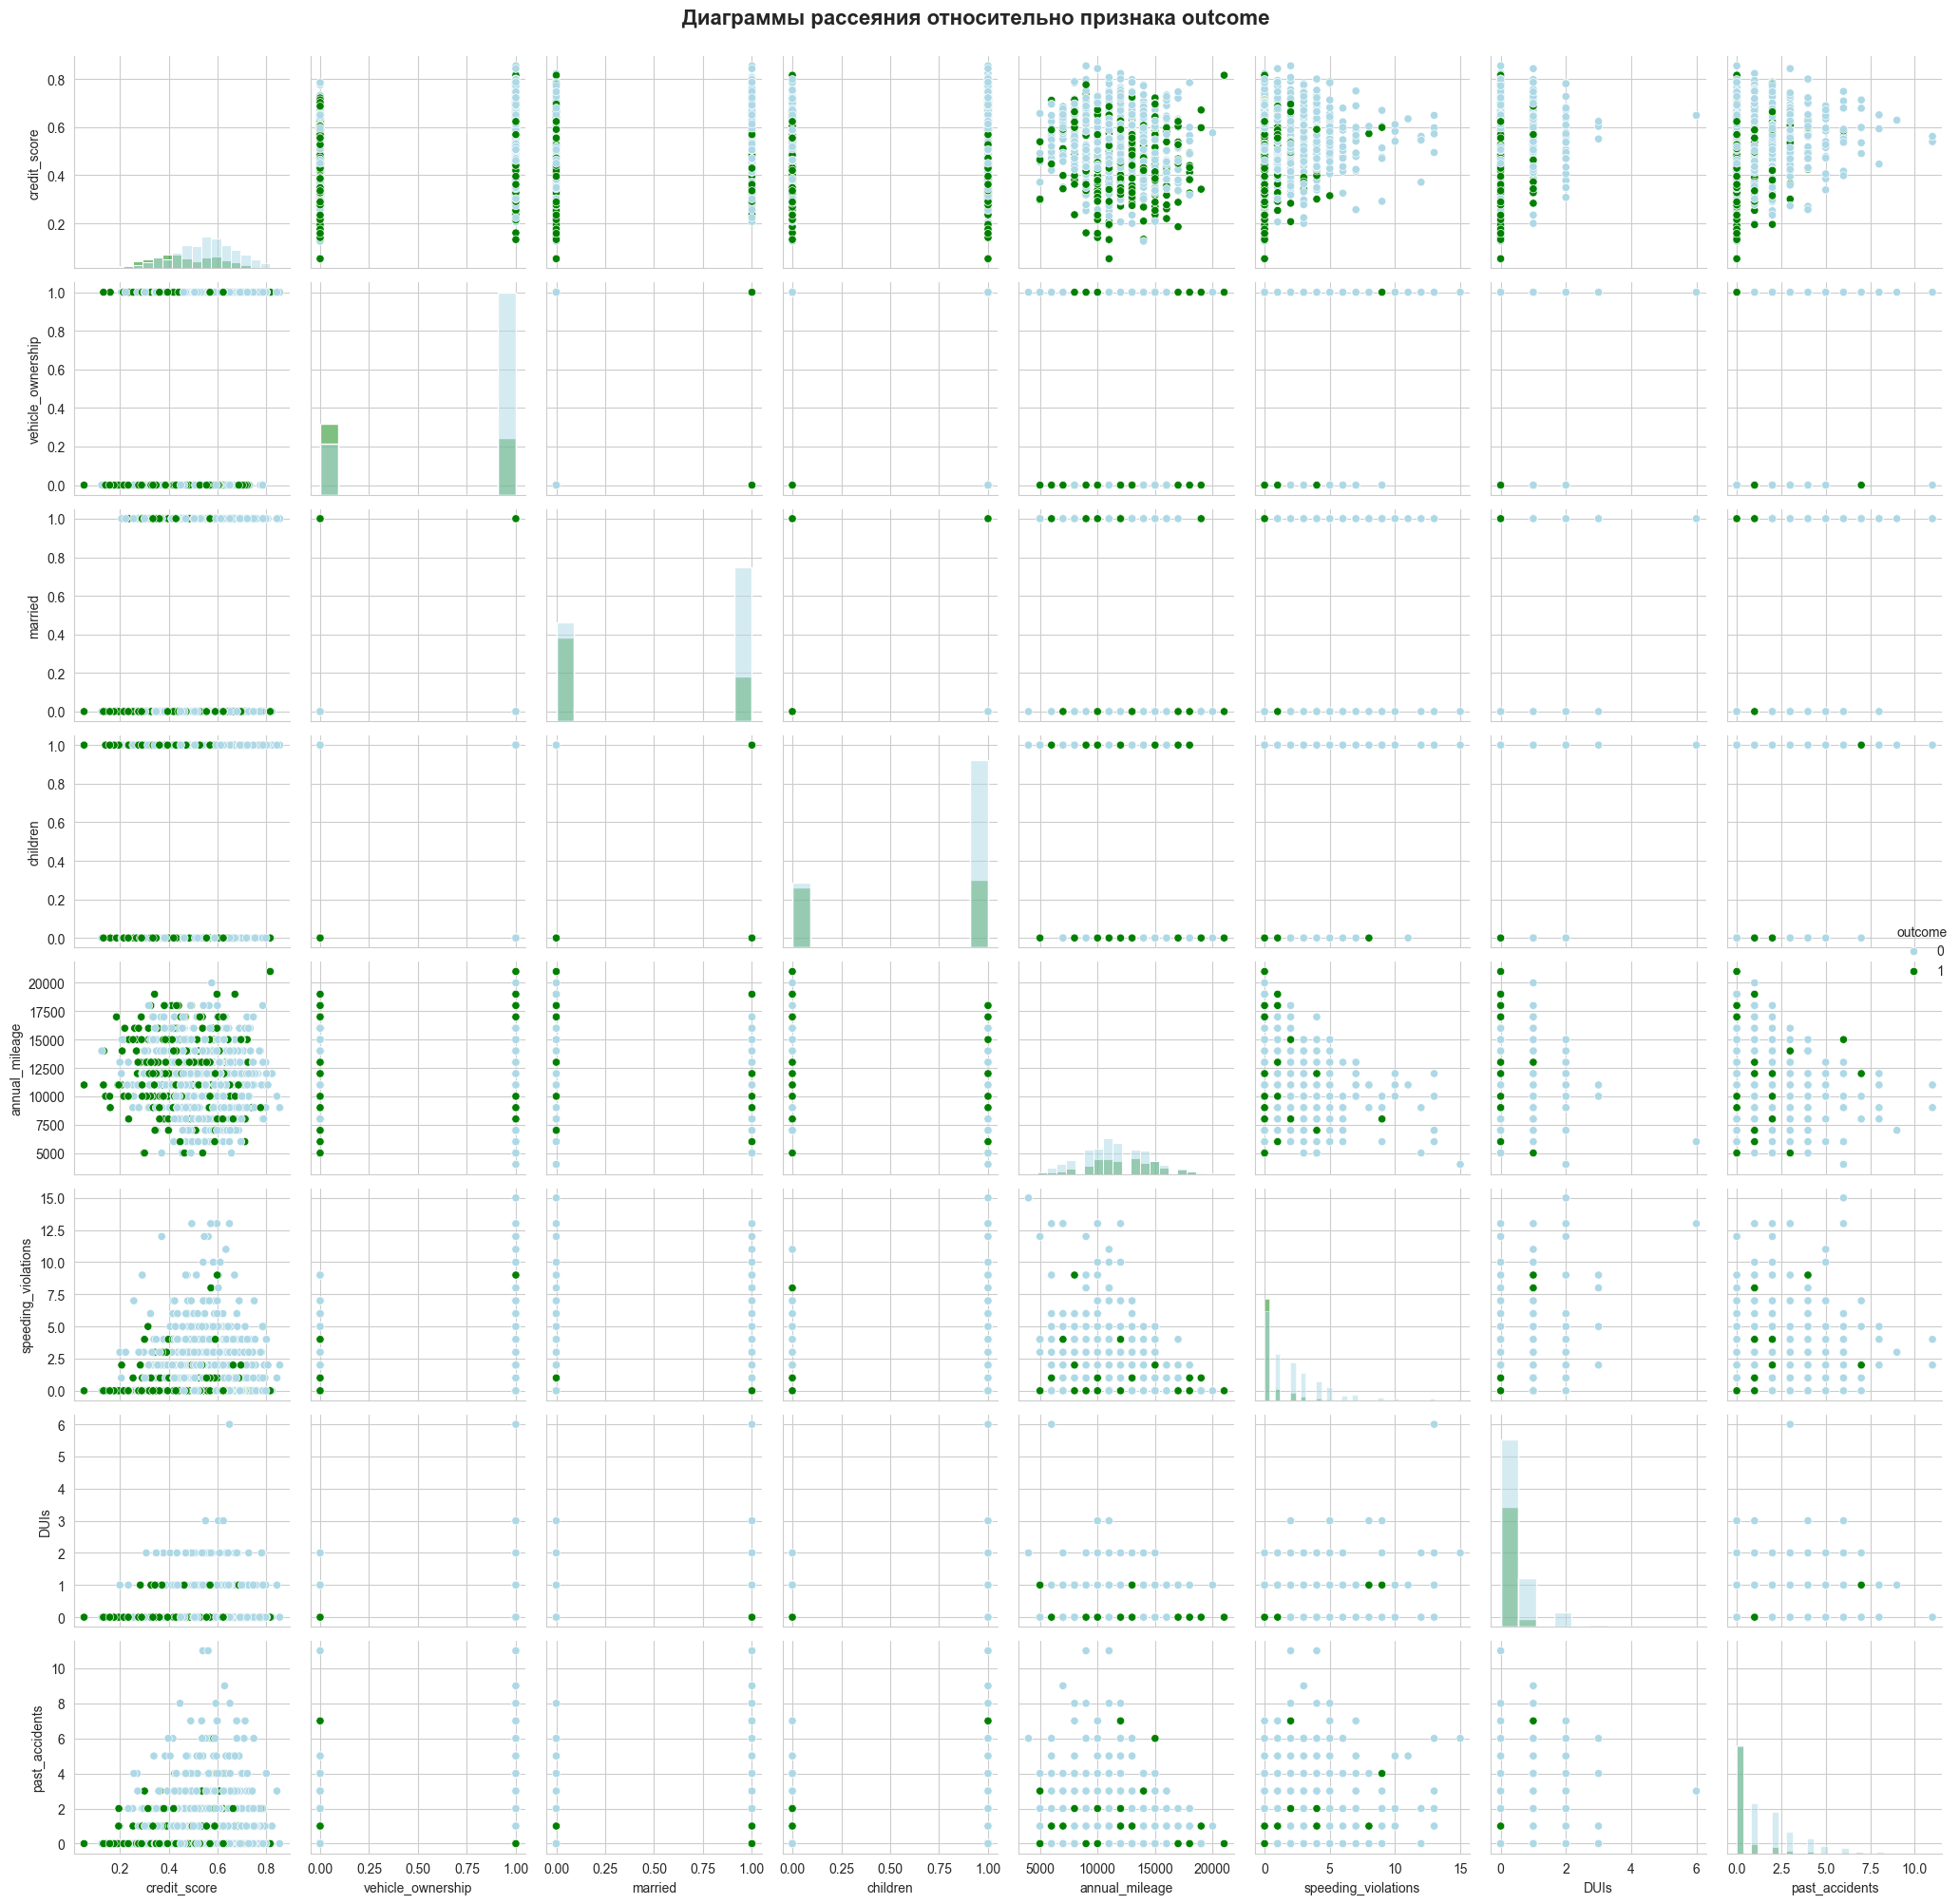

In [125]:
sns.pairplot(dataset.iloc[np.random.choice(np.arange(dataset.shape[0]), size = 1000, replace = False)], hue = 'outcome', diag_kind = 'hist', palette = ['lightblue', 'green'])
plt.suptitle("Диаграммы рассеяния относительно признака outcome", fontsize=16, fontweight='bold', y = 1)
plt.tight_layout()
plt.show()

**4. Обработка пропущенные значения**

In [126]:
dataset.isnull().sum()

age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           957
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
annual_mileage         952
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

Пропуски присутствуют у признаков **credit_score** и **annual_mileage**.

In [127]:
dataset.isnull().sum()*100/(dataset.count() + dataset.isnull().sum())

age                    0.000000
gender                 0.000000
driving_experience     0.000000
education              0.000000
income                 0.000000
credit_score           9.593985
vehicle_ownership      0.000000
vehicle_year           0.000000
married                0.000000
children               0.000000
annual_mileage         9.543860
speeding_violations    0.000000
DUIs                   0.000000
past_accidents         0.000000
outcome                0.000000
dtype: float64

Заполним пропуски медианным значением:

In [128]:
values = {"credit_score": dataset.credit_score.median(), "annual_mileage": dataset.annual_mileage.median()}
dataset = dataset.fillna(value = values)

**5. Обработка категориальных признаков**

In [129]:
dataset.columns

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'annual_mileage', 'speeding_violations', 'DUIs',
       'past_accidents', 'outcome'],
      dtype='object')

In [130]:
dataset = pd.get_dummies(dataset, columns = ['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_year'], drop_first = True)
dataset.head()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,...,gender_male,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_none,education_university,income_poverty,income_upper class,income_working class,vehicle_year_before 2015
0,0.629027,1,0,1,12000.0,0,0,0,0,False,...,False,False,False,False,False,False,False,True,False,False
1,0.357757,0,0,0,16000.0,0,0,0,1,False,...,True,False,False,False,True,False,True,False,False,True
2,0.493146,1,0,0,11000.0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,True,True
3,0.206013,1,0,1,11000.0,0,0,0,0,False,...,True,False,False,False,False,True,False,False,True,True
4,0.388366,1,0,0,12000.0,2,0,1,1,True,...,True,True,False,False,True,False,False,False,True,True


**6. Проведение нормализации**

In [131]:
from sklearn.preprocessing import MinMaxScaler

minmxscaler= MinMaxScaler()
dataset['annual_mileage']  = minmxscaler.fit_transform(np.array(dataset['annual_mileage']).reshape(-1, 1))
dataset

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,...,gender_male,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_none,education_university,income_poverty,income_upper class,income_working class,vehicle_year_before 2015
0,0.629027,1,0,1,0.50,0,0,0,0,False,...,False,False,False,False,False,False,False,True,False,False
1,0.357757,0,0,0,0.70,0,0,0,1,False,...,True,False,False,False,True,False,True,False,False,True
2,0.493146,1,0,0,0.45,0,0,0,0,False,...,False,False,False,False,False,False,False,False,True,True
3,0.206013,1,0,1,0.45,0,0,0,0,False,...,True,False,False,False,False,True,False,False,True,True
4,0.388366,1,0,0,0.50,2,0,1,1,True,...,True,True,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.582787,1,0,0,0.70,0,0,1,0,True,...,False,True,False,False,False,True,False,True,False,True
9996,0.522231,1,0,1,0.50,1,0,0,0,True,...,False,True,False,False,True,False,False,False,False,False
9997,0.470940,1,0,1,0.60,0,0,0,0,True,...,True,False,False,False,False,False,False,False,False,True
9998,0.364185,0,0,1,0.55,2,0,1,1,True,...,False,True,False,False,False,False,True,False,False,True



**7. Классификатор ближайших соседей**

Ошибки (обучающая/тестовая): 0.001 / 0.231
Точность (обучающая/тестовая): 99.9% / 76.9%


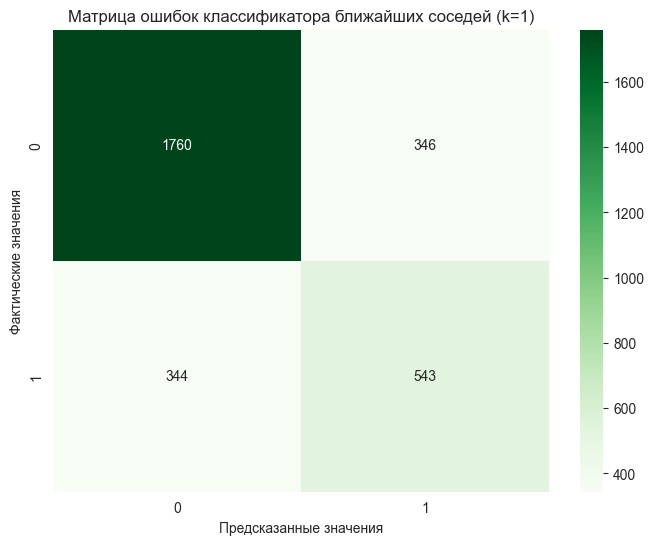

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # метрики
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    train_err = np.mean(y_train != y_train_pred)
    test_err = np.mean(y_test != y_test_pred)
    
    print(f"Ошибки (обучающая/тестовая): {train_err:.3f} / {test_err:.3f}")
    print(f"Точность (обучающая/тестовая): {train_acc:.1f}% / {test_acc:.1f}%")
    
    return y_test_pred, confusion_matrix(y_test, y_test_pred)

model = KNeighborsClassifier(n_neighbors=1)
y_pred, cm = evaluate_model(model, x_train, y_train, x_test, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок классификатора ближайших соседей (k=1)')
plt.show()

**8. Вычисление ошибки на обучающей и тестовой выборках. Выбор оптимального значения гиперпараметра.**

In [134]:
errs_train = []
errs_test = []
neighbours_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]

for i in neighbours_list:    
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    y_test_predict  = model.predict(x_test)
    errs_train.append(np.mean(y_train != y_train_predict))
    errs_test.append(np.mean(y_test != y_test_predict))
    
results_df = pd.DataFrame([errs_train, errs_test], columns = neighbours_list,index=["Ошибка обучающей выборки", "Ошибка тестовой выборки"])
results_df  

,1,2,3,4,5,10,15,20,25,30,40,50
Ошибка обучающей выборки,0.000716,0.116156,0.114580,0.138642,0.136351,0.159983,0.166714,0.168003,0.169436,0.173303,0.174019,0.17760
Ошибка тестовой выборки,0.230538,0.206482,0.200468,0.190444,0.188774,0.181757,0.179753,0.172402,0.177080,0.178750,0.180087,0.18276


Ошибки (обучающая/тестовая): 0.167 / 0.180
Точность (обучающая/тестовая): 83.3% / 82.0%


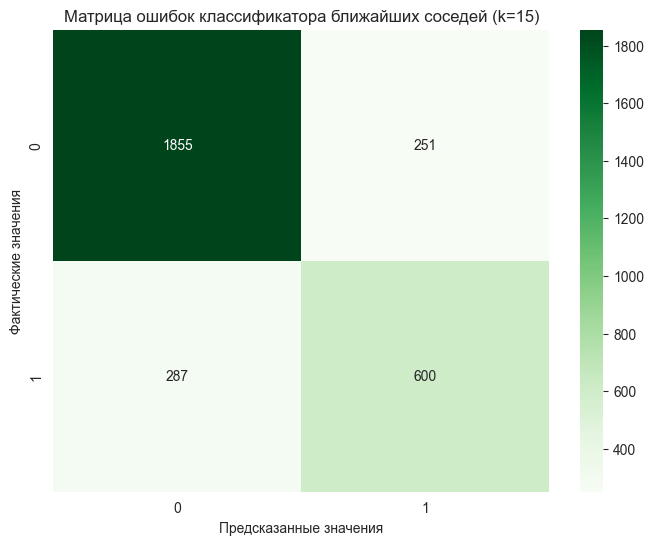

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    train_err = np.mean(y_train != y_train_pred)
    test_err = np.mean(y_test != y_test_pred)
    
    print(f"Ошибки (обучающая/тестовая): {train_err:.3f} / {test_err:.3f}")
    print(f"Точность (обучающая/тестовая): {train_acc:.1f}% / {test_acc:.1f}%")
    
    return y_test_pred, confusion_matrix(y_test, y_test_pred)

model = KNeighborsClassifier(n_neighbors=15)
y_pred, cm = evaluate_model(model, x_train, y_train, x_test, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок классификатора ближайших соседей (k=15)')
plt.show()

Ошибки (обучающая/тестовая): 0.169 / 0.177
Точность (обучающая/тестовая): 83.1% / 82.3%


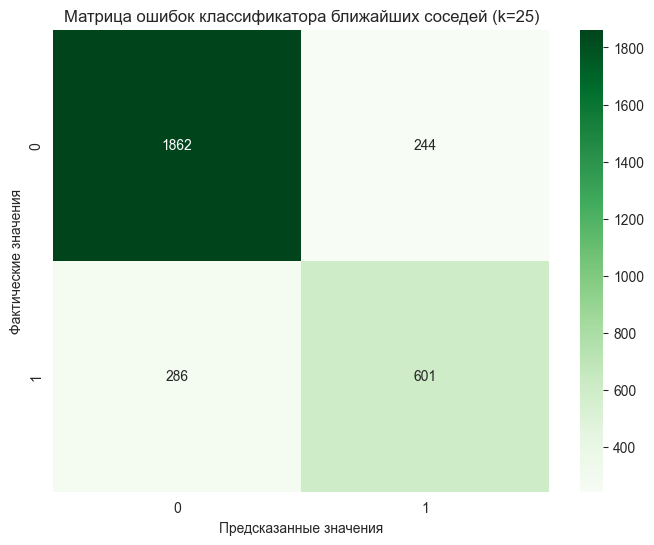

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    train_err = np.mean(y_train != y_train_pred)
    test_err = np.mean(y_test != y_test_pred)
    
    print(f"Ошибки (обучающая/тестовая): {train_err:.3f} / {test_err:.3f}")
    print(f"Точность (обучающая/тестовая): {train_acc:.1f}% / {test_acc:.1f}%")
    
    return y_test_pred, confusion_matrix(y_test, y_test_pred)

model = KNeighborsClassifier(n_neighbors=25)
y_pred, cm = evaluate_model(model, x_train, y_train, x_test, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок классификатора ближайших соседей (k=25)')
plt.show()

Ошибки (обучающая/тестовая): 0.172 / 0.178
Точность (обучающая/тестовая): 82.8% / 82.2%


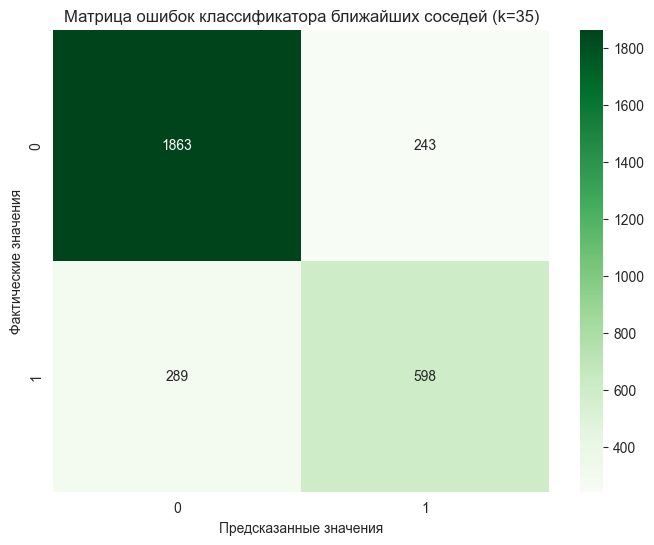

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    train_err = np.mean(y_train != y_train_pred)
    test_err = np.mean(y_test != y_test_pred)
    
    print(f"Ошибки (обучающая/тестовая): {train_err:.3f} / {test_err:.3f}")
    print(f"Точность (обучающая/тестовая): {train_acc:.1f}% / {test_acc:.1f}%")
    
    return y_test_pred, confusion_matrix(y_test, y_test_pred)

model = KNeighborsClassifier(n_neighbors=35)
y_pred, cm = evaluate_model(model, x_train, y_train, x_test, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок классификатора ближайших соседей (k=35)')
plt.show()

Ошибки (обучающая/тестовая): 0.175 / 0.181
Точность (обучающая/тестовая): 82.5% / 81.9%


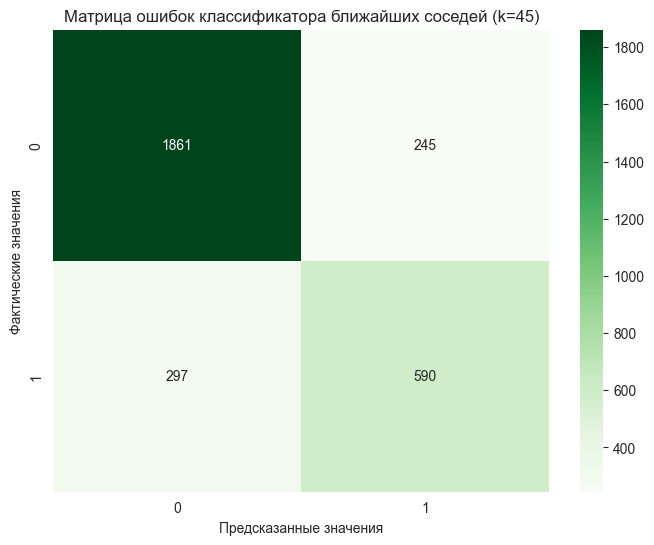

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    train_err = np.mean(y_train != y_train_pred)
    test_err = np.mean(y_test != y_test_pred)
    
    print(f"Ошибки (обучающая/тестовая): {train_err:.3f} / {test_err:.3f}")
    print(f"Точность (обучающая/тестовая): {train_acc:.1f}% / {test_acc:.1f}%")
    
    return y_test_pred, confusion_matrix(y_test, y_test_pred)

model = KNeighborsClassifier(n_neighbors=45)
y_pred, cm = evaluate_model(model, x_train, y_train, x_test, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок классификатора ближайших соседей (k=45)')
plt.show()

Определение класса по ближайшему соседу при k = 1 показало точность классификации на обучающей выборке ~99.9% и ~77% на тестовой выборке.

С увеличением k до 25 было получено оптимальное значение параметра, и точность классификации составила ~83% на обучающей выборке и ~82,3% на тестовой выборке.

**9. Общие выводы**

1. Создали модель, которая хорошо предсказывает, какие клиенты вероятнее подадут страховое требование
2. Лучше всего коррелируются данные о прошлых авариях и нарушениях ПДД (в результате превышения скоростного режима и вождения в нетрезвом состоянии)
3. Возраст, пол и семейное положение клиента почти не влияют на прогноз

Результаты, которые получилось достичь:
1. Точность прогноза: ~82.3%
3. Оптимальное количество соседей в алгоритме: 25-35